# 2024C 数据可视化 复现

导入库
这里导入了多个常用的Python库，每个库的作用如下：


- matplotlib.pyplot（简称plt）：用于绘制静态、动态图表和其他图形。
- seaborn（简称sns）：基于Matplotlib的高级接口，用于绘制统计图表，提供了更多的样式和接口。
- pyecharts.options：提供了PyEcharts图表的各种配置选项。
- pyecharts.globals：提供了PyEcharts的一些全局配置，例如当前的笔记本类型。
- pypalettes：用于加载和获取调色板。
- pyecharts.charts：包含了各种图表类型的类，这里导入了Pie用于绘制饼图。

这段代码的主要功能是设置和配置Python中用于数据分析、处理和可视化的多个库，包括NumPy、Pandas、Matplotlib、Seaborn和PyEcharts。具体配置包括忽略警告、设置Matplotlib图表的字体为楷体、确保负号正确显示，以及指定PyEcharts的输出类型为Jupyter Notebook。这些配置是为了确保在后续的数据分析和可视化过程中，图表能够符合特定的格式要求，并且能够在Jupyter Notebook环境中正确显示。

In [1]:
# coding: utf-8
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyecharts.options as opt
import warnings
from pyecharts.globals import CurrentConfig, NotebookType
from pypalettes import load_cmap, get_hex  
from pyecharts.charts import Pie

warnings.filterwarnings('ignore') # 这行代码的作用是忽略所有的警告信息，通常是用来避免一些不必要的警告干扰代码的执行。
plt.rcParams['font.family'] = 'Kaiti' #设置楷体
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_NOTEBOOK #这行代码设置了PyEcharts的输出类型为Jupyter Notebook，这样生成的图表可以直接在Jupyter Notebook中显示。

In [2]:
# 读取Excel文件，注意处理可能的路径和文件存在性问题
df1 = pd.read_excel('./C/附件1.xlsx', index_col=0, sheet_name=0)

# 查看实际列名
print(df1.columns)
df1 = df1.drop('说明 ', axis=1)

# 显示df1内容
df1

Index(['地块类型', '地块面积/亩', '说明 '], dtype='object')


,地块类型,地块面积/亩
地块名称,,
A1,平旱地,80.0
A2,平旱地,55.0
A3,平旱地,35.0
A4,平旱地,72.0
A5,平旱地,68.0
A6,平旱地,55.0
B1,梯田,60.0
B2,梯田,46.0
B3,梯田,40.0


In [3]:
df2 = pd.read_excel('./C/附件1.xlsx', index_col=0, sheet_name=1)
print(df2.columns)
df2 = df2.drop('说明', axis=1) # axis：指定删除的是行还是列。axis=0 表示删除行，axis=1 表示删除列
df2

Index(['作物名称', '作物类型', '种植耕地', '说明'], dtype='object')


,作物名称,作物类型,种植耕地
作物编号,,,
1,黄豆,粮食（豆类）,平旱地\n\n梯田\n\n山坡地\n
2,黑豆,粮食（豆类）,NaN
3,红豆,粮食（豆类）,NaN
4,绿豆,粮食（豆类）,NaN
5,爬豆,粮食（豆类）,NaN
6,小麦,粮食,NaN
7,玉米,粮食,NaN
8,谷子,粮食,NaN
9,高粱,粮食,NaN


In [4]:
island = df1.loc["A1" : "D8"]
print(island.columns)
island

Index(['地块类型', '地块面积/亩'], dtype='object')


,地块类型,地块面积/亩
地块名称,,
A1,平旱地,80.0
A2,平旱地,55.0
A3,平旱地,35.0
A4,平旱地,72.0
A5,平旱地,68.0
A6,平旱地,55.0
B1,梯田,60.0
B2,梯田,46.0
B3,梯田,40.0


In [5]:
group_type = island.groupby('地块类型').sum().reset_index() # reset_index() 方法用于将分组后的 DataFrame 的索引重置为默认整数索引，并将原来的索引列转换为普通列。
lst = group_type.values.tolist() # 将 DataFrame 转换为列表形式
group_type

,地块类型,地块面积/亩
0,山坡地,108.0
1,平旱地,365.0
2,梯田,619.0
3,水浇地,109.0


In [6]:
outer  = []
for i in lst:
    name = i[0]
    select = island.query('地块类型 == @name')['地块面积/亩']
    num = 1
    for j in select.values.tolist():
        outer.append(
            (f'{name}_{num}', j)
            )
        num += 1
print(outer)
    

[('山坡地_1', 15.0), ('山坡地_2', 13.0), ('山坡地_3', 15.0), ('山坡地_4', 18.0), ('山坡地_5', 27.0), ('山坡地_6', 20.0), ('平旱地_1', 80.0), ('平旱地_2', 55.0), ('平旱地_3', 35.0), ('平旱地_4', 72.0), ('平旱地_5', 68.0), ('平旱地_6', 55.0), ('梯田_1', 60.0), ('梯田_2', 46.0), ('梯田_3', 40.0), ('梯田_4', 28.0), ('梯田_5', 25.0), ('梯田_6', 86.0), ('梯田_7', 55.0), ('梯田_8', 44.0), ('梯田_9', 50.0), ('梯田_10', 25.0), ('梯田_11', 60.0), ('梯田_12', 45.0), ('梯田_13', 35.0), ('梯田_14', 20.0), ('水浇地_1', 15.0), ('水浇地_2', 10.0), ('水浇地_3', 14.0), ('水浇地_4', 6.0), ('水浇地_5', 10.0), ('水浇地_6', 12.0), ('水浇地_7', 22.0), ('水浇地_8', 20.0)]


In [7]:
# 使用分组色板，区别度高
cmap = load_cmap('Set2', cmap_type='discrete')  # 或 tab20、Paired

inner_data = lst
outer_data = outer

pie = (
    Pie()
    .add(
        series_name="耕地类型",
        data_pair=inner_data,
        radius=["0%", "50%"],
        label_opts=opt.LabelOpts(
            position="inside",
            formatter="{b}\n{d}%",
            is_show=True,
            font_size=14,
            font_family="KaiTi"
        ),
    )
    .set_colors(cmap.colors[:len(inner_data)])  # 内圈颜色，区别度高
    .add(
        series_name="组成部分",
        data_pair=outer_data,
        radius=["60%", "80%"],
        label_opts=opt.LabelOpts(is_show=False),
    )
    .set_colors(cmap.colors[:len(inner_data)] * 10)  # 外圈颜色扩展
    .set_global_opts(
        title_opts=opt.TitleOpts(
            title="耕地结构双层饼图",
            subtitle="内圈为耕地类型占比，外圈为组成部分",
            pos_left="center"
        ),
        legend_opts=opt.LegendOpts(is_show=False)
    )
)

pie.render_notebook()

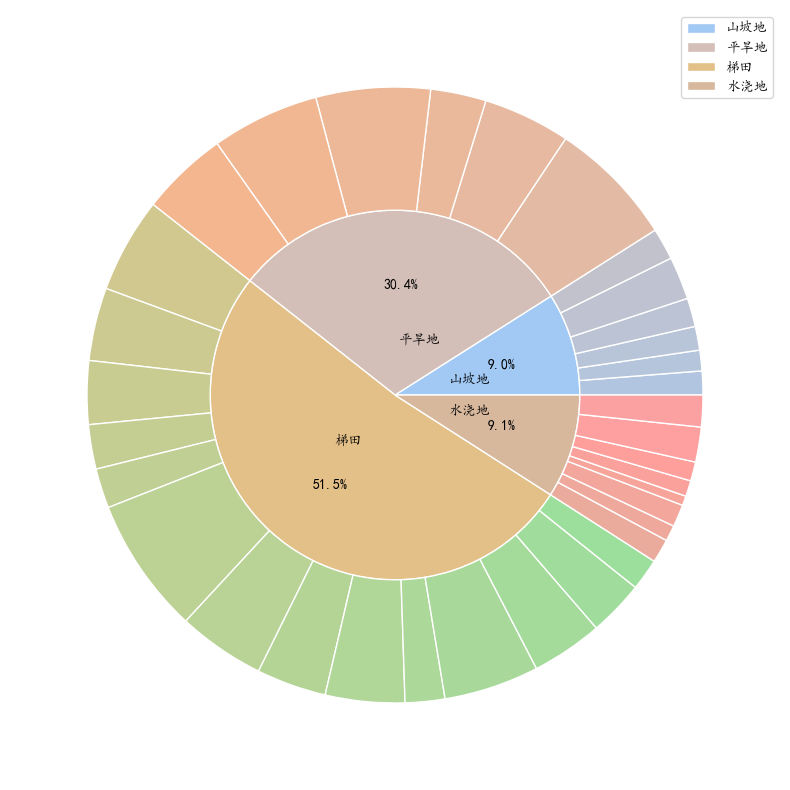

In [11]:
inner = pd.DataFrame(lst).set_index(0)
inner /= inner.sum()

out = pd.DataFrame(outer).set_index(0)
out /= out.sum()

# 构造颜色索引列表
outer_color_index = [i + 5 for i in range(6)]
outer_color_index.extend([i + 20 for i in range(6)])
outer_color_index.extend([i + 40 for i in range(14)])
outer_color_index.extend([i + 80 for i in range(8)])


cmap = load_cmap('pastel', cmap_type='continuous')
inner_camp = cmap([0, 15, 35, 75])
outer_cmap = cmap(outer_color_index)

# 绘制饼图
plt.figure(figsize=(8, 8))
# 绘制内层饼图
plt.pie(inner[1],
        labels=inner.index,
        radius=0.6,
        autopct="%1.1f%%",
        colors=inner_camp,
        labeldistance=0.3,
        wedgeprops=dict(width=0.6, edgecolor='white'))
plt.legend()
# 绘制外层饼图
plt.pie(out[1],
        radius=1,
        colors=outer_cmap,
        wedgeprops=dict(width=0.4, edgecolor='white'))
plt.tight_layout()
# 可根据需要显示或保存图表，如 plt.show() 显示在交互环境，或 plt.savefig('pie_chart.png') 保存
plt.show()
